# **Phase 2 - Data Exploration & Visualization**

The data exploration and visualization stage complement each other and represent the main part of the descriptive process the data provide us, in a first moment. During this stage, we start to take some descriptive notes from the dataset in order to identify first trends, patterns, and relationships among the variables.

Visualization tools will play a crucial role in this process, as they allow us to represent data graphically, making complex information easier to understand and interpret. By combining exploration and visualization, we enhance our ability to draw meaningful insights, guiding our analysis until informing our conclusions.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr 

In [218]:
files = {
    'datasets/clean_dataset.xlsx': ['SGIF_2011_2020'],
    'datasets/Estatisticas_Incendios_SGIF_2001_2023.xlsx': ['Estatisticas_PortugalContinent', 'Estatisticas_Distrito', 'Estatisticas_Concelho']
}

datasets = {}

for file, sheets in files.items():
    for sheet in sheets:
        if sheet == 'SGIF_2011_2020':
            datasets[sheet] = pd.read_excel(file, sheet_name='Sheet1')
        else:
            datasets[sheet] = pd.read_excel(file, sheet_name=sheet)

datasets

{'SGIF_2011_2020':         Ano  AreaTotal_ha  Duracao_Horas Distrito               Concelho  \
 0      2011        0.0100       0.733333    Porto               Penafiel   
 1      2011        0.0050       0.783333    Porto      Vila Nova de Gaia   
 2      2011        0.0400       2.033333    Porto      Vila Nova de Gaia   
 3      2011      140.0000       8.083333    Viseu       São Pedro do Sul   
 4      2011        0.1000       2.333333    Viseu           Castro Daire   
 ...     ...           ...            ...      ...                    ...   
 18411  2020        0.0050       0.633333    Porto      Paços de Ferreira   
 18412  2020        0.0100       1.283333    Viseu                Cinfães   
 18413  2020        0.0014       0.383333    Viseu  São João da Pesqueira   
 18414  2020        0.0050       0.716667    Viseu           Castro Daire   
 18415  2020        0.0100       0.933333    Porto                  Trofa   
 
       TypeArea  
 0       Forest  
 1       Forest  
 2

### Fire Duration and Frequency

To explore how the average fire duration influences the frequency of wildfires across different regions over time, we need to identify columns related to fire duration and frequency. The <i>'Num_IncendiosRurais'</i> column seems to represent the number of rural fires, which could be used as a measure of frequency. The <i>'Duracao_Horas'</i> column appears to help us finding insights about the fires duration.

In order to start summarizing data, we will calculate basic key statistics which might help us describing this context.

Total number of fires for each district of interest, for the relevant years:

In [220]:
# Define the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Normalize the 'Distrito' column to handle case sensitivity
datasets['Estatisticas_Distrito']['Distrito'] = datasets['Estatisticas_Distrito']['Distrito'].str.strip().str.title()

# Filter the dataset for the districts of interest
filtered_districts = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]

# Group by district and sum the number of incidents
total_fires_per_district = filtered_districts.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Print the total number of fires for each district
print("Total number of fires for each district:")
for index, row in total_fires_per_district.iterrows():
    print(f"{row['Distrito']}: {row['Num_IncendiosRurais']}")

Total number of fires for each district:
Faro: 8968
Porto: 102395
Viseu: 38326


About the district with the highest total number of fires is:

In [221]:
# Calculate the total number of rural fires for each district without filtering by year
total_fires_per_district = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].isin(districts_of_interest)]

# Group by district and sum the number of incidents
total_fires_per_district = total_fires_per_district.groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()

# Identify the district with the highest number of fires
max_fires_district = total_fires_per_district.loc[total_fires_per_district['Num_IncendiosRurais'].idxmax()]

# Print the result
print(f"The district with the highest number of fires is {max_fires_district['Distrito']} with {max_fires_district['Num_IncendiosRurais']} total fires.")

The district with the highest number of fires is Porto with 102395 total fires.


Per relevant district, here's the mode found:

In [222]:
# Specify districts and years
districts = ['Faro', 'Porto', 'Viseu']

# Mode for total fires per district
mode_per_district = {}
for district in districts:
    mode_fires = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'] == district]['Num_IncendiosRurais'].mode()[0]
    mode_per_district[district] = mode_fires

# Display results for each district
for district, mode in mode_per_district.items():
    print(f"Mode for total number of fires in {district} district: {mode}")

Mode for total number of fires in Faro district: 274
Mode for total number of fires in Porto district: 1359
Mode for total number of fires in Viseu district: 523


Porto is also the portuguese district with the second highest population density, according to the publicly acessible database of the Portuguese National Statistical Institute (or INE).

Also as a starting reference, we may find the overall average fire duration (including all of the locations described in the dataset):

In [223]:
average_fire_duration = round(datasets['SGIF_2011_2020']['Duracao_Horas'].mean(), 2)

# Print the result
print(f"Average fire duration in hours: {average_fire_duration}h")# Calculate the average fire duration from the 'SGIF_2011_2020' dataset


Average fire duration in hours: 1.94h


After a view about the overal average fire duration, now per district:

In [224]:
# Define the districts of interest
districts_of_interest = ['Porto', 'Viseu', 'Faro']

# Normalize the 'Distrito' column to handle case sensitivity in the SGIF_2011_2020 dataset
datasets['SGIF_2011_2020']['Distrito'] = datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title()

# Filter the SGIF_2011_2020 dataset for the districts of interest
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate the average fire duration per district
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()

# Round the average duration to 2 decimal places
average_fire_duration_per_district['Duracao_Horas'] = average_fire_duration_per_district['Duracao_Horas'].round(2)

# Print the average fire duration for each district
print("Average fire duration per district:")
for index, row in average_fire_duration_per_district.iterrows():
    print(f"{row['Distrito']}: {row['Duracao_Horas']}h")

Average fire duration per district:
Faro: 1.63h
Porto: 1.73h
Viseu: 2.74h


Now, the minimum and maximum fire duration (overall and per district):

In [225]:
# Overall minimum and maximum fire duration across all years
overall_min_duration = datasets['SGIF_2011_2020']['Duracao_Horas'].min()
overall_max_duration = datasets['SGIF_2011_2020']['Duracao_Horas'].max()

print(f"Overall minimum fire duration: {overall_min_duration} hours")
print(f"Overall maximum fire duration: {overall_max_duration} hours")

# Minimum and maximum fire duration for districts Porto, Faro, and Viseu
districts_of_interest = ['Porto', 'Faro', 'Viseu']
filtered_district_data = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

min_max_duration_per_district = filtered_district_data.groupby('Distrito')['Duracao_Horas'].agg(['min', 'max']).reset_index()
print("\nMinimum and maximum fire duration for the districts of Porto, Faro, and Viseu:")
for index, row in min_max_duration_per_district.iterrows():
    print(f"{row['Distrito']}: Min = {row['min']} hours, Max = {row['max']} hours")

# Minimum and maximum fire duration per year (2011, 2016, 2020)
years_of_interest = [2011, 2016, 2020]
filtered_year_data = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Ano'].isin(years_of_interest)]

min_max_duration_per_year = filtered_year_data.groupby('Ano')['Duracao_Horas'].agg(['min', 'max']).reset_index()
print("\nMinimum and maximum fire duration per year (2011, 2016, 2020):")
for index, row in min_max_duration_per_year.iterrows():
    print(f"Year {int(row['Ano'])}: Min = {row['min']:.2f} hours, Max = {row['max']:.2f} hours")

Overall minimum fire duration: 0.0166666666666667 hours
Overall maximum fire duration: 182.85 hours

Minimum and maximum fire duration for the districts of Porto, Faro, and Viseu:
Faro: Min = 0.05 hours, Max = 55.05 hours
Porto: Min = 0.0333333333333333 hours, Max = 99.0333333333333 hours
Viseu: Min = 0.0166666666666667 hours, Max = 182.85 hours

Minimum and maximum fire duration per year (2011, 2016, 2020):
Year 2011: Min = 0.08 hours, Max = 99.03 hours
Year 2016: Min = 0.02 hours, Max = 87.85 hours
Year 2020: Min = 0.03 hours, Max = 182.85 hours


About the average for the number of fires:

In [226]:
# Calculate the average of total fires (Num_IncendiosRurais)
average_total_fires = round(datasets['Estatisticas_PortugalContinent']['Num_IncendiosRurais'].mean(), 2)
print(f"Average of total fires overall: {average_total_fires}")

# Calculate the average number of fires for each district
districts_of_interest = ['Porto', 'Viseu', 'Faro']
district_averages = {}

for district in districts_of_interest:
    district_data = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].str.title() == district]
    average_fires = round(district_data['Num_IncendiosRurais'].mean(), 2)
    district_averages[district] = average_fires

# Print the average fires per district
print("Average of fires per district:")
for district, average in district_averages.items():
    print(f"{district}: {average}")

Average of total fires overall: 20464.83
Average of fires per district:
Porto: 4451.96
Viseu: 1666.35
Faro: 389.91


Average is a measure that considers all values in the dataset, particularly when the data is symmetrically distributed without outliers. The median is more robust to outliers as it represents the middle value. In this case:

In [227]:
# Calculate the median of total fires across all data (Num_IncendiosRurais)
total_median_fires = datasets['Estatisticas_PortugalContinent']['Num_IncendiosRurais'].median()
print(f"Median of total fires overall: {total_median_fires}")

# Calculate the median number of fires for each district
districts_of_interest = ['Porto', 'Viseu', 'Faro']
district_medians = {}

for district in districts_of_interest:
    district_data = datasets['Estatisticas_Distrito'][datasets['Estatisticas_Distrito']['Distrito'].str.title() == district]
    median_fires = district_data['Num_IncendiosRurais'].median()
    district_medians[district] = median_fires

# Print the median fires per district
print("Median of fires per district:")
for district, median in district_medians.items():
    print(f"{district}: {median}")

Median of total fires overall: 22067.5
Median of fires per district:
Porto: 4729.0
Viseu: 1857.0
Faro: 354.0


For comparing wildfire durations across district like Porto, Viseu, and Faro for specific years (2011, 2016, 2020), we should focus on the data at the district level. We need to filter this data for the specified districts and years, and check the results.

In [228]:
# Specify the years and districts of interest
years = [2011, 2016, 2020]
districts = ['Viseu', 'Faro', 'Porto']  # Added Porto to the districts list

# Dictionary to store average fire durations
average_durations = {}

for district in districts:
    average_durations[district] = {}
    for year in years:
        # Filter by district and specific year
        avg_duration = datasets['SGIF_2011_2020'][
            (datasets['SGIF_2011_2020']['Distrito'].str.strip().str.lower() == district.lower()) &
            (datasets['SGIF_2011_2020']['Ano'] == year)
        ]['Duracao_Horas'].mean()
        
        average_durations[district][year] = round(avg_duration, 2) if not np.isnan(avg_duration) else "No data"

# Display the results with spacing between districts
for district, yearly_data in average_durations.items():
    for year, duration in yearly_data.items():
        print(f"Average fire duration in {district} district in {year}: {duration} hours")
    print()  # Adds a blank line between districts

Average fire duration in Viseu district in 2011: 3.15 hours
Average fire duration in Viseu district in 2016: 2.23 hours
Average fire duration in Viseu district in 2020: 2.08 hours

Average fire duration in Faro district in 2011: 2.04 hours
Average fire duration in Faro district in 2016: 1.15 hours
Average fire duration in Faro district in 2020: 1.41 hours

Average fire duration in Porto district in 2011: 2.27 hours
Average fire duration in Porto district in 2016: 1.27 hours
Average fire duration in Porto district in 2020: 1.05 hours



Following this primary descriptive scenario, the dispersion of data is crucial to be understood as well.

Variance tells us how data points spread out around the mean

In [229]:
# Normalize the 'Distrito' column in the SGIF_2011_2020 dataset to handle case sensitivity
datasets['SGIF_2011_2020']['Distrito'] = datasets['SGIF_2011_2020']['Distrito'].str.strip().str.title()

# Filter the SGIF_2011_2020 dataset for the districts of interest
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate variance and standard deviation of fire duration per district
variance_stddev_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].agg(['var', 'std']).reset_index()

# Round the variance and standard deviation to 2 decimal places
variance_stddev_per_district['var'] = variance_stddev_per_district['var'].round(2)
variance_stddev_per_district['std'] = variance_stddev_per_district['std'].round(2)

# Print the variance and standard deviation for each district
print("Variance and Standard Deviation of Fire Duration per District:")
for index, row in variance_stddev_per_district.iterrows():
    print(f"{row['Distrito']} - Variance: {row['var']} hours², Standard Deviation: {row['std']} hours")

Variance and Standard Deviation of Fire Duration per District:
Faro - Variance: 12.7 hours², Standard Deviation: 3.56 hours
Porto - Variance: 8.05 hours², Standard Deviation: 2.84 hours
Viseu - Variance: 34.5 hours², Standard Deviation: 5.87 hours


The following scatterplot shows the result :

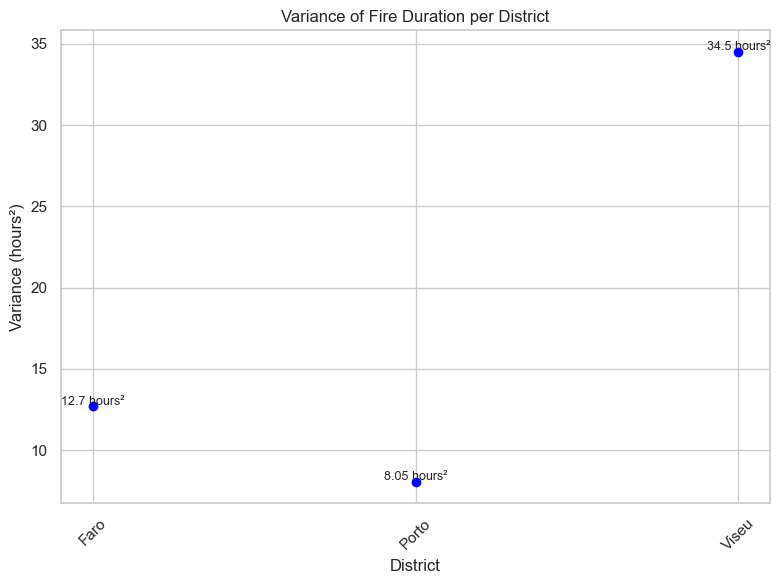

In [230]:
# Scatter plot for Variance of Fire Duration per District
plt.figure(figsize=(8, 6))
plt.scatter(variance_stddev_per_district['Distrito'], variance_stddev_per_district['var'], color='blue')

# Add labels for each district
for i, row in variance_stddev_per_district.iterrows():
    plt.text(row['Distrito'], row['var'] + 0.1, f"{row['var']} hours²", ha='center', fontsize=9)

# Customize the plot
plt.title("Variance of Fire Duration per District")
plt.xlabel("District")
plt.ylabel("Variance (hours²)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Display the plot
plt.show()

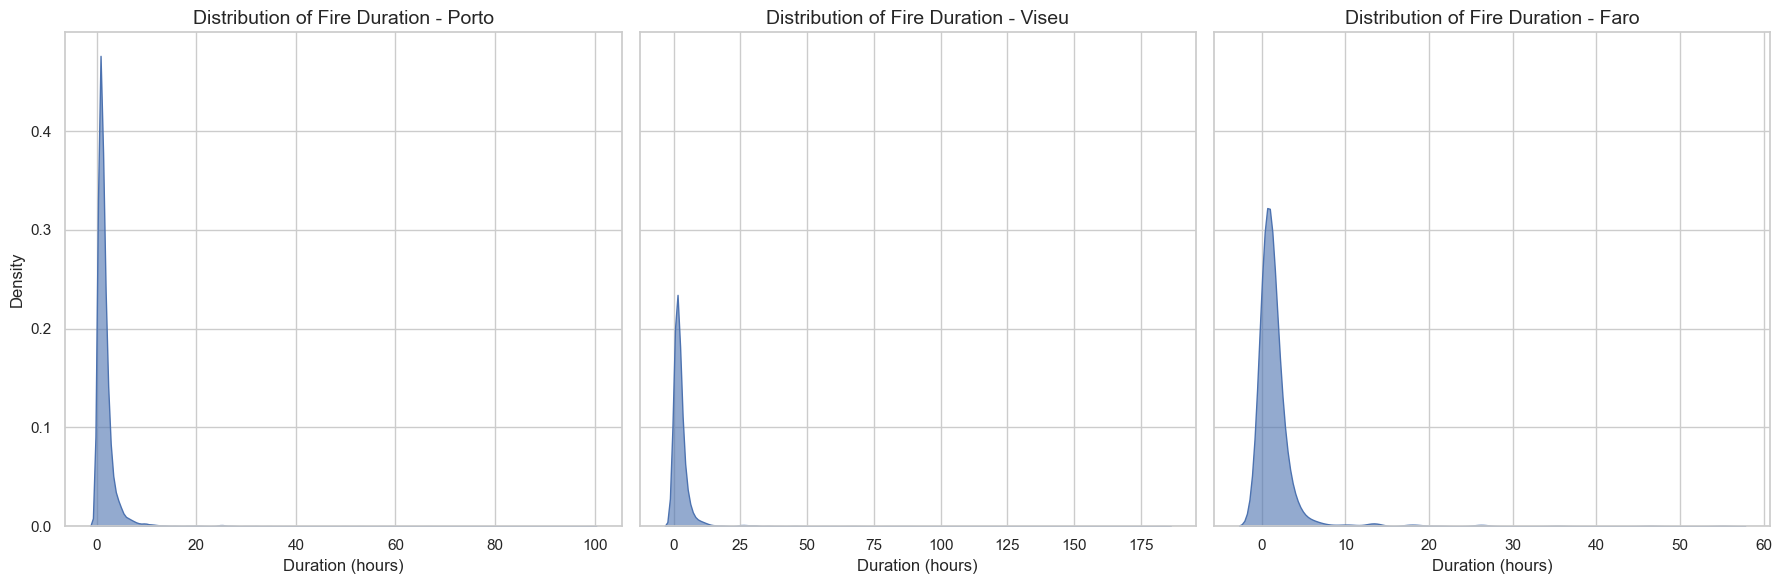

In [231]:
# Set up a grid of 1 row and 3 columns for separate plots of each district
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot the distribution for each district in its own subplot
for i, district in enumerate(districts_of_interest):
    district_data = filtered_fires[filtered_fires['Distrito'] == district]
    
    # Use seaborn's kdeplot in the respective subplot
    sns.kdeplot(district_data['Duracao_Horas'], fill=True, alpha=0.6, ax=axes[i])
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Distribution of Fire Duration - {district}', fontsize=14)
    axes[i].set_xlabel('Duration (hours)', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Variance tells us how data points spread out around the mean. It helps us detecting patterns, and it can suggest the presence of outliers or a diverse range of data points.

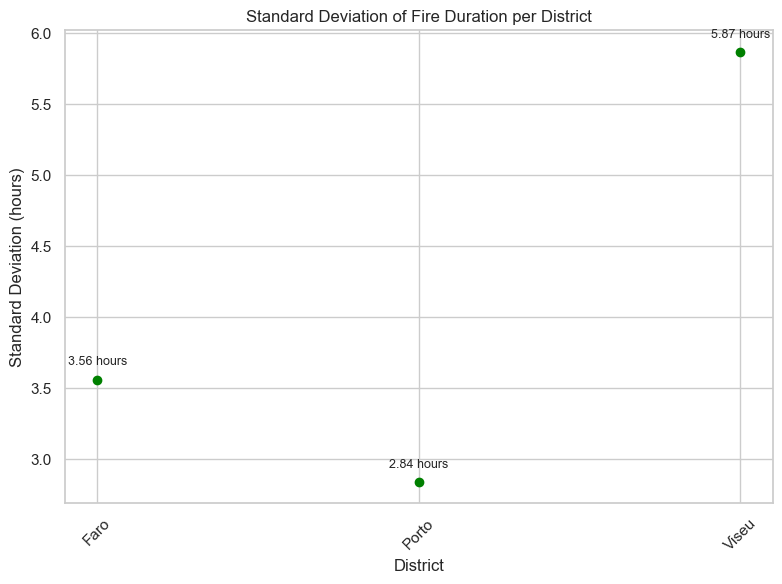

In [232]:
# Scatter plot for Standard Deviation of Fire Duration per District
plt.figure(figsize=(8, 6))
plt.scatter(variance_stddev_per_district['Distrito'], variance_stddev_per_district['std'], color='green')

# Add labels for each district
for i, row in variance_stddev_per_district.iterrows():
    plt.text(row['Distrito'], row['std'] + 0.1, f"{row['std']} hours", ha='center', fontsize=9)

# Customize the plot
plt.title("Standard Deviation of Fire Duration per District")
plt.xlabel("District")
plt.ylabel("Standard Deviation (hours)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Display the plot
plt.show()

scatter plot with distribution and standard deviation of the 3 districts

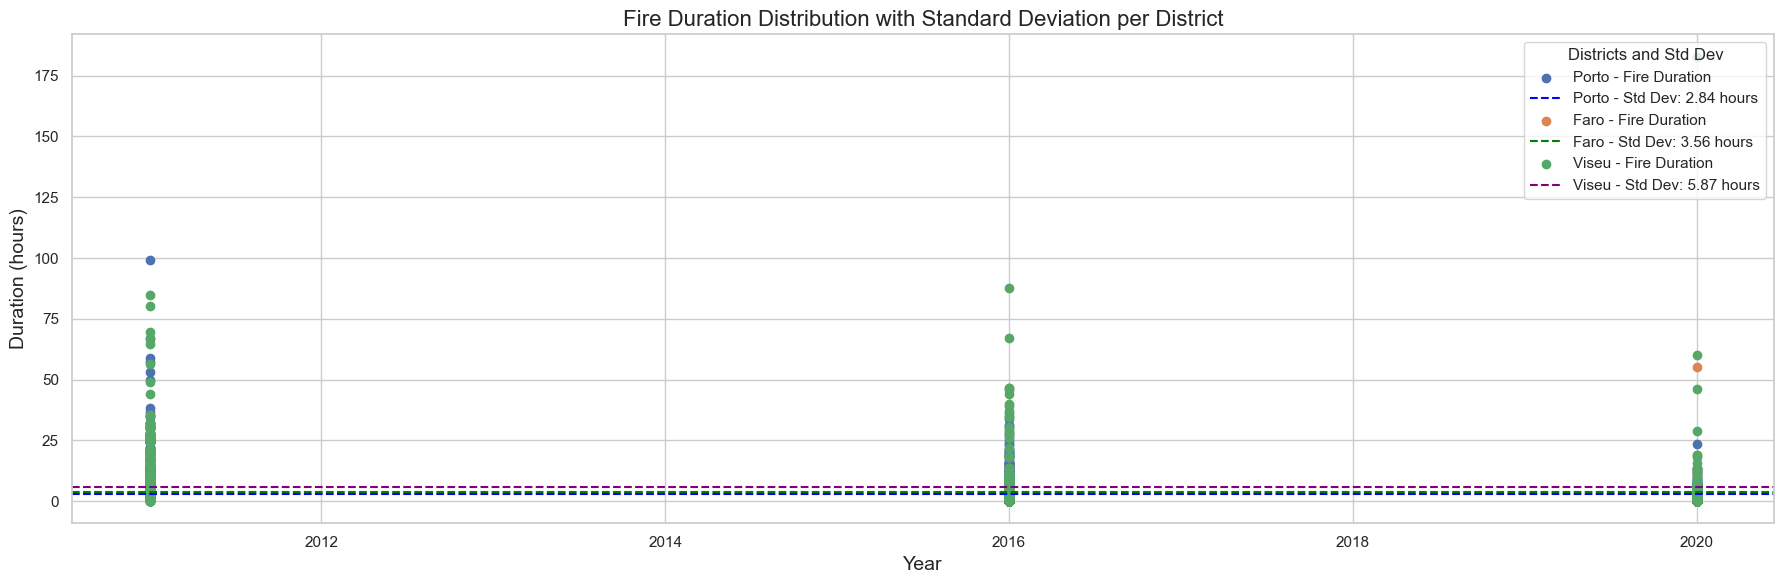

In [233]:
# Filter for the districts of interest: Porto, Faro, and Viseu
districts_of_interest = ['Porto', 'Faro', 'Viseu']
filtered_fires = datasets['SGIF_2011_2020'][datasets['SGIF_2011_2020']['Distrito'].isin(districts_of_interest)]

# Calculate standard deviation per district
std_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].std().reset_index()

# Define colors for each district's standard deviation line
std_colors = {'Porto': 'blue', 'Faro': 'green', 'Viseu': 'purple'}

# Set up the figure
plt.figure(figsize=(18, 6))

# Plot scatter and standard deviation line for each district
for i, district in enumerate(districts_of_interest):
    district_data = filtered_fires[filtered_fires['Distrito'] == district]
    district_std = std_per_district[std_per_district['Distrito'] == district]['Duracao_Horas'].values[0]
    
    # Create scatter plot for the fire duration distribution in the district
    plt.scatter(district_data['Ano'], district_data['Duracao_Horas'], label=f'{district} - Fire Duration')
    
    # Add a horizontal line for the standard deviation in the district's color
    plt.axhline(y=district_std, color=std_colors[district], linestyle='--', label=f'{district} - Std Dev: {district_std:.2f} hours')

# Customize the plot
plt.title('Fire Duration Distribution with Standard Deviation per District', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Duration (hours)', fontsize=14)
plt.legend(title='Districts and Std Dev', loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

scatter plot of fire frequency vs duration standard deviation per district: Porto, Faro, Viseu

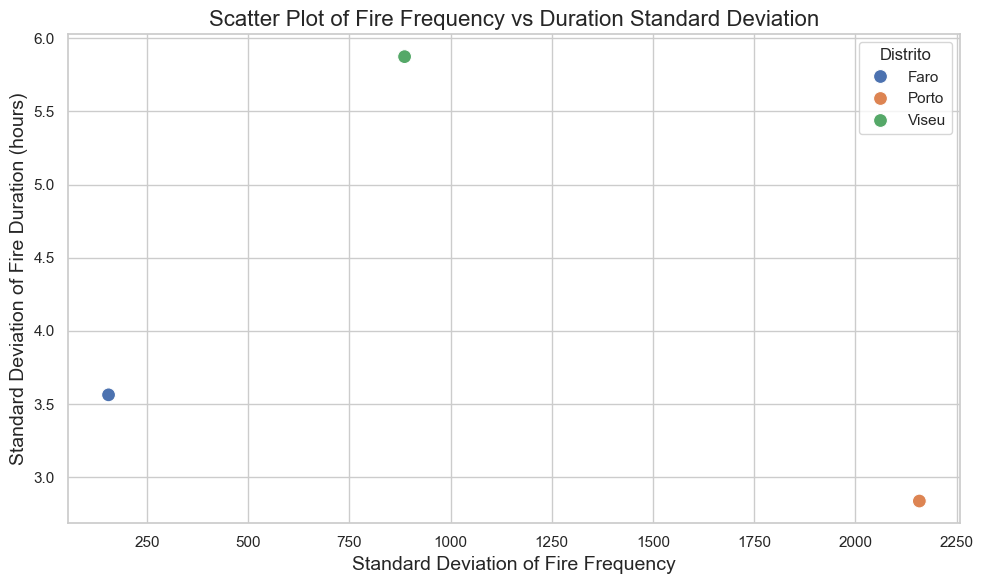

In [240]:
# Calculate the standard deviation of the number of fires per district
fire_std_dev = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].std().reset_index()
fire_std_dev.columns = ['Distrito', 'Fire_StdDev']

# Calculate the standard deviation of fire duration per district
duration_std_dev = datasets['SGIF_2011_2020'].groupby('Distrito')['Duracao_Horas'].std().reset_index()
duration_std_dev.columns = ['Distrito', 'Duration_StdDev']

# Merge the two dataframes on Distrito
std_dev_df = pd.merge(fire_std_dev, duration_std_dev, on='Distrito')

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=std_dev_df, x='Fire_StdDev', y='Duration_StdDev', hue='Distrito', s=100)

# Customize the plot
plt.title('Scatter Plot of Fire Frequency vs Duration Standard Deviation', fontsize=16)
plt.xlabel('Standard Deviation of Fire Frequency', fontsize=14)
plt.ylabel('Standard Deviation of Fire Duration (hours)', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Fire Duration vs Frequency Across Districts Over Time

<Figure size 1000x600 with 0 Axes>

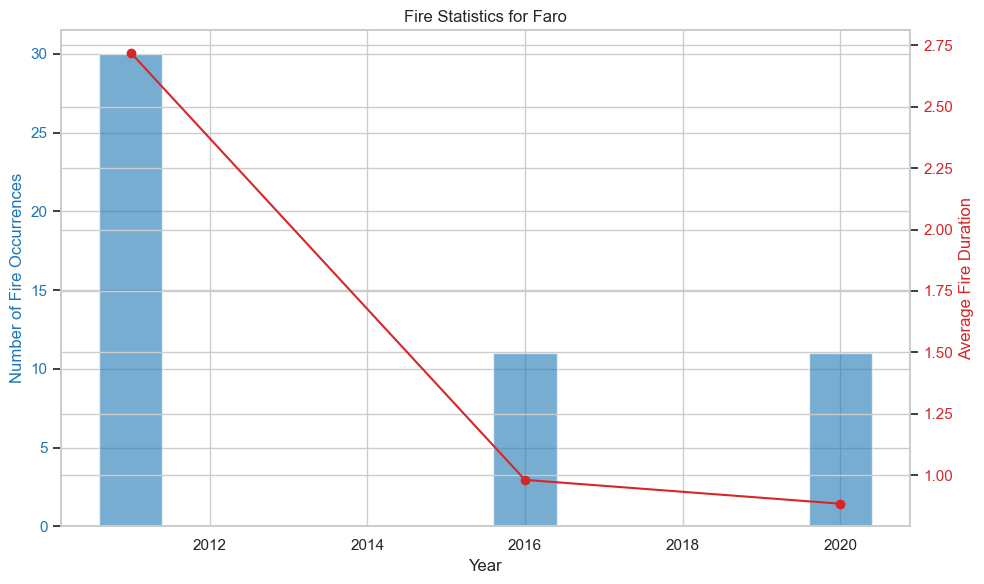

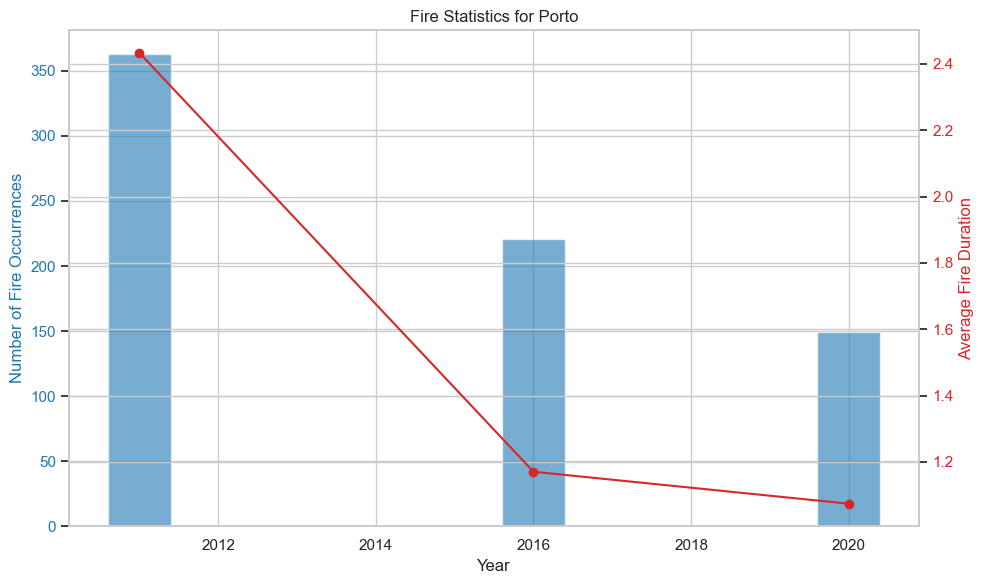

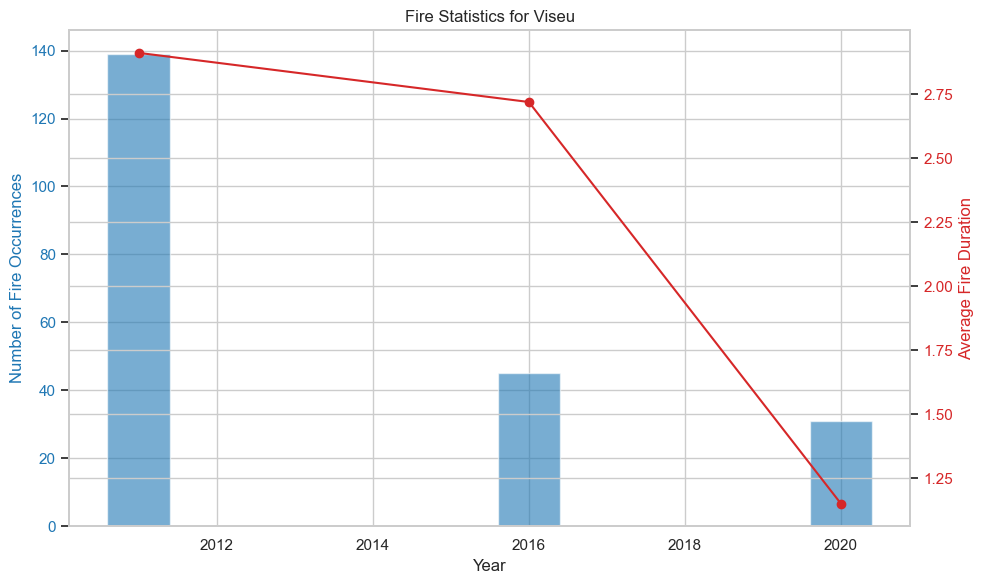

In [235]:
dataset_sample = datasets['SGIF_2011_2020'].sample(n=1000, random_state=999)
dataset_sample.sample(n=5, random_state=999)

# Agrupar os dados por distrito e ano
df = dataset_sample
grouped = df.groupby(['Distrito', 'Ano']).agg(
    avg_fire_duration = ('Duracao_Horas', 'mean'),  # Duração média do fogo
    fire_occurrences = ('Duracao_Horas', 'count')   # Número de ocorrências de incêndios
).reset_index()

# Plotando o gráfico com dois eixos Y (dual-axis plot)
plt.figure(figsize=(10, 6))
regions = grouped['Distrito'].unique()

for region in regions:
    data_region = grouped[grouped['Distrito'] == region]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Gráfico de barras (eixo esquerdo) - Número de ocorrências de incêndios
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Fire Occurrences', color=color)
    ax1.bar(data_region['Ano'], data_region['fire_occurrences'], color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    # Eixo direito para a duração média dos incêndios
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Average Fire Duration', color=color)
    ax2.plot(data_region['Ano'], data_region['avg_fire_duration'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Fire Statistics for {region}')
    fig.tight_layout()
    plt.show()


The dual-axis plot visualizes fire statistics for different regions (districts) over the years. Specifically, it displays two key metrics:

1. Number of Fire Occurrences (Bar Graph): Represented by blue bars on the left y-axis, this metric shows the total count of fire occurrences for each district in the specified years. Higher bars indicate more frequent fire incidents in that region for a given year.

2. Average Fire Duration (Line Graph): Illustrated by a red line on the right y-axis, this metric indicates the average duration of fires (in hours) for each district. The data points connected by the line represent the average duration for the corresponding years, allowing us to see trends in how long fires last over time.

By observing these graphs, we can see that the duration of fires has shown a tendency to decrease over the years, except for Faro, where we identified an increase from 2016 to 2020.

To help understand more about the relationship of both variables fire duration and the frequency of fires, the correlation analysis might give insights that could lead us from a descriotive scenario to a more inferential one.

Here, we will use the Spearman's Rank correlation as we already have seen there are outliers, a there's a slight sugestion that the data is not normally distributed.

In [236]:
# Step 1: Prepare average fire duration and total fires for correlation

# Average fire duration per district
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()
average_fire_duration_per_district = average_fire_duration_per_district.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Total number of fires per district
total_fires_per_district = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_district = total_fires_per_district.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

# Step 2: Merge data for correlation
correlation_data = pd.merge(average_fire_duration_per_district, total_fires_per_district, on='Distrito')

# Step 3: Calculate Spearman correlation
spearman_corr, p_value = spearmanr(correlation_data['Avg_Fire_Duration'], correlation_data['Total_Fires'])

# Print the results
print("Spearman Correlation Coefficient:", spearman_corr)
print("P-value:", p_value)

Spearman Correlation Coefficient: 0.5
P-value: 0.6666666666666667


As this Correlation Coefficient is 0.5, and it ranges from -1 to 1, the value 0.5 suggests a moderate positive correlation between average fire duration and the total number of fires. 

This means that, in general, as the average duration of fires increases, the number of fires tends to increase as well. This slight tendency (moderate positive), in accordance with the remaining scenario described previously in this chapter, helps to introduce this analysis into a more inferential part.

Spearman Correlation Coefficient: 0.5
P-value: 0.6666666666666667


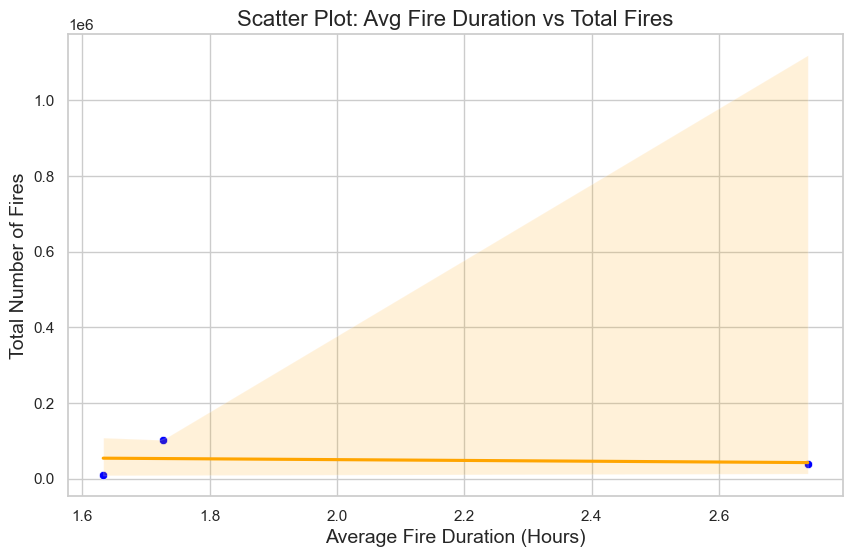

In [242]:
# Step 1: Prepare average fire duration and total fires for correlation
average_fire_duration_per_district = filtered_fires.groupby('Distrito')['Duracao_Horas'].mean().reset_index()
average_fire_duration_per_district = average_fire_duration_per_district.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Total number of fires per district
total_fires_per_district = datasets['Estatisticas_Distrito'].groupby('Distrito')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_district = total_fires_per_district.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

# Step 2: Merge data for correlation
correlation_data = pd.merge(average_fire_duration_per_district, total_fires_per_district, on='Distrito')

# Step 3: Calculate Spearman correlation
spearman_corr, p_value = spearmanr(correlation_data['Avg_Fire_Duration'], correlation_data['Total_Fires'])

# Print the results
print("Spearman Correlation Coefficient:", spearman_corr)
print("P-value:", p_value)

# Create a scatter plot to show correlation
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    x='Avg_Fire_Duration',
    y='Total_Fires',
    data=correlation_data,
    color='blue',  # Change color as needed
)

# Add a regression line
sns.regplot(
    x='Avg_Fire_Duration',
    y='Total_Fires',
    data=correlation_data,
    scatter=False,  # Do not draw scatter again
    color='orange'  # Color of the regression line
)

# Add titles and labels
plt.title('Scatter Plot: Avg Fire Duration vs Total Fires', fontsize=16)
plt.xlabel('Average Fire Duration (Hours)', fontsize=14)
plt.ylabel('Total Number of Fires', fontsize=14)

# Show the plot
plt.show()

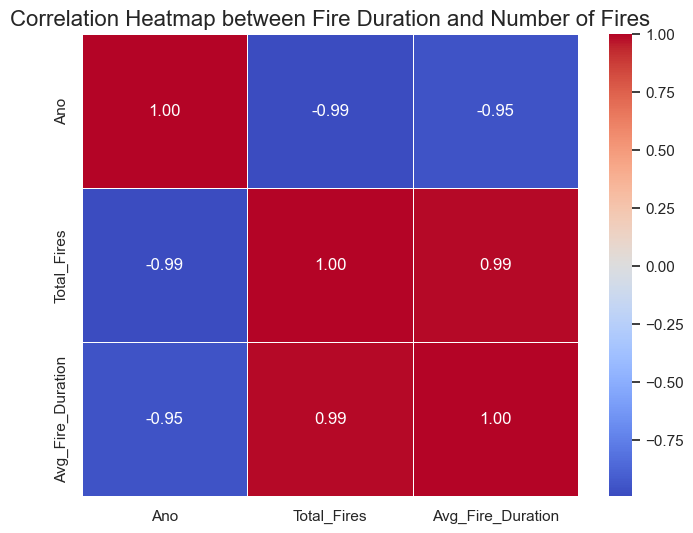

In [248]:
# Step 1: Prepare data for correlation
# Calculate the total number of fires and average fire duration per year as before
total_fires_per_year = datasets['Estatisticas_PortugalContinent'].groupby('Ano')['Num_IncendiosRurais'].sum().reset_index()
total_fires_per_year = total_fires_per_year.rename(columns={"Num_IncendiosRurais": "Total_Fires"})

average_duration_per_year = filtered_fires.groupby('Ano')['Duracao_Horas'].mean().reset_index()
average_duration_per_year = average_duration_per_year.rename(columns={"Duracao_Horas": "Avg_Fire_Duration"})

# Merge datasets
merged_data = pd.merge(total_fires_per_year, average_duration_per_year, on='Ano')

# Step 2: Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Step 3: Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the title
plt.title('Correlation Heatmap between Fire Duration and Number of Fires', fontsize=16)

# Show the plot
plt.show()


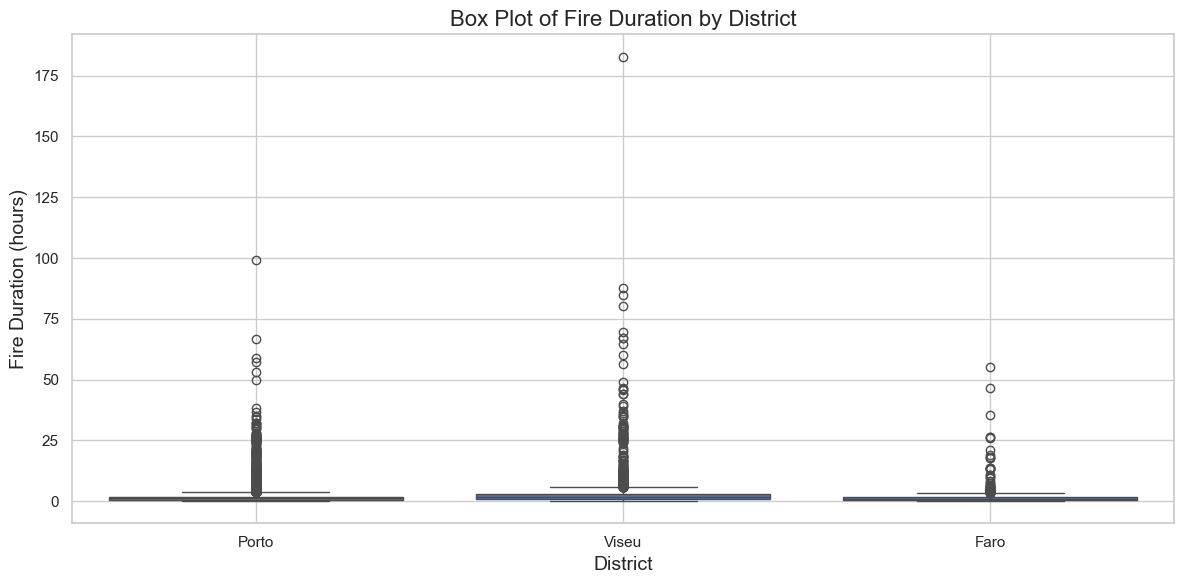

In [249]:
# Prepare the data for box plot
box_plot_data = filtered_fires.copy()
box_plot_data['Distrito'] = box_plot_data['Distrito'].str.strip().str.title()  # Normalize district names

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=box_plot_data, x='Distrito', y='Duracao_Horas')

# Customize the plot
plt.title('Box Plot of Fire Duration by District', fontsize=16)
plt.xlabel('District', fontsize=14)
plt.ylabel('Fire Duration (hours)', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

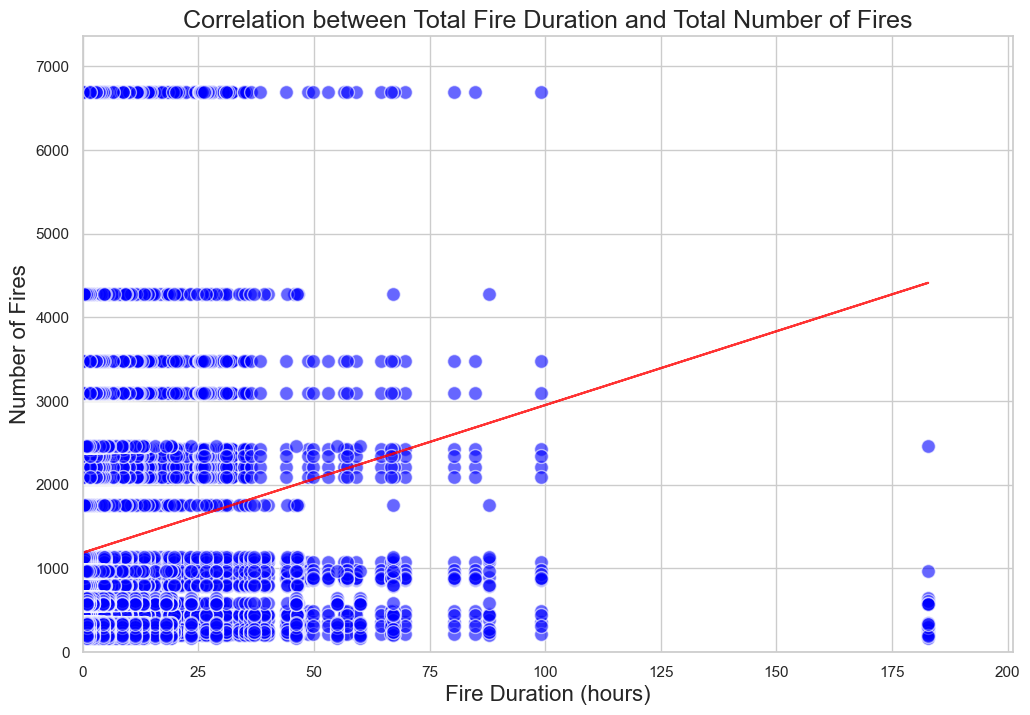

In [255]:
def plot_total_correlation_between_fire_duration_and_number_of_fires(datasets):
    """
    Creates a scatter plot showing the total correlation between fire duration and the number of fires
    across all districts.

    Args:
      datasets: Dictionary containing the datasets.
    """
    
    plt.figure(figsize=(12, 8))

    # Merge the datasets
    district_sgif = datasets['SGIF_2011_2020']
    district_stats = datasets['Estatisticas_Distrito']

    # Merge the two datasets on the year
    merged_data = pd.merge(district_sgif, district_stats, on='Ano', how='inner')

    # Create a scatter plot for all data
    plt.scatter(merged_data['Duracao_Horas'], merged_data['Num_IncendiosRurais'], 
                color='blue', alpha=0.6, edgecolor='w', s=100)

    # Fit a linear regression line if there's enough data
    if len(merged_data) >= 2:  # Ensure there are at least 2 data points
        # Check for unique values to avoid fitting issues
        if merged_data['Duracao_Horas'].nunique() > 1 and merged_data['Num_IncendiosRurais'].nunique() > 1:
            m, b = np.polyfit(merged_data['Duracao_Horas'], merged_data['Num_IncendiosRurais'], 1)
            plt.plot(merged_data['Duracao_Horas'], m * merged_data['Duracao_Horas'] + b, 
                     color='red', alpha=0.8)  # Line of best fit

    # Customize the plot
    plt.title('Correlation between Total Fire Duration and Total Number of Fires', fontsize=18)
    plt.xlabel('Fire Duration (hours)', fontsize=16)
    plt.ylabel('Number of Fires', fontsize=16)
    plt.xlim(0, merged_data['Duracao_Horas'].max() * 1.1)  # Adjust x-axis limits
    plt.ylim(0, merged_data['Num_IncendiosRurais'].max() * 1.1)  # Adjust y-axis limits
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot the total correlation
plot_total_correlation_between_fire_duration_and_number_of_fires(datasets)